# Processing train and dev datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

# load dataframe from CSV file
df_train = pd.read_csv("../Data/train2/train_text.csv", sep="\t")
df_dev = pd.read_csv("../Data/dev2/dev_text.csv", sep="\t")
print("----------------- Shapes : ----------------")
print("Train : " + str(df_train.shape))
print("Dev  : " + str(df_dev.shape))

----------------- Shapes : ----------------
Train : (6129, 4)
Dev  : (1000, 4)


** Data and visualisations ** 

In [2]:
# Show the ten first rows
df_train.loc[0 : 10,:]

,Filename,Text,Class,Language
0,../Data/train2/txt/AAAWNA.txt,REPUBLIQUE FRANCAISE Nationalité Française Car...,C2,fr
1,../Data/train2/txt/AAUVHC.txt,17 08 12 15:10 MLTC 00212537680032 p.2 في ليلة...,C3,ar
2,../Data/train2/txt/ABBABC.txt,Hi sweetie ! just a quick note to say ... HAPP...,C3,en
3,../Data/train2/txt/ABBABD.txt,BE THE CHANGE YOU WANT TO SEE IN THE WORLD !,C3,en
4,../Data/train2/txt/ABBABE.txt,scenario 1 Bridgewater House Barlow Street Wor...,C3,en
5,../Data/train2/txt/ABBABF.txt,remember - Jane got 100 % on the vast test she...,C3,en
6,../Data/train2/txt/ABBACE.txt,- get map from hostel - get Euros visit eat . ...,C3,en
7,../Data/train2/txt/ABBADF.txt,"Hi Lucie, The postman left your delivery with ...",C3,en
8,../Data/train2/txt/ABBAGH.txt,"To whom it may concern, I am writing to inform...",C3,en
9,../Data/train2/txt/ABBAJL.txt,"Dear Jay, I hope ¤{eveything/everything}¤ is o...",C3,en


In [3]:
# Show the ten first rows
df_dev.loc[0 : 10,:]

,Filename,Text,Class,Language
0,../Data/dev2/txt/AAAESO.txt,Publications Order Form Telephone (Optional): ...,C2,en
1,../Data/dev2/txt/AASJEP.txt,Thirty-seven people are on trial in Paris accu...,C2,en
2,../Data/dev2/txt/ACKDIN.txt,صندوق المعامير الخيري استمارة كفالة يتيم الكاف...,C1,ar
3,../Data/dev2/txt/ACKPIN.txt,صندوق المعامير الخيري استمارة كفالة يتيم الكاف...,C1,ar
4,../Data/dev2/txt/ACPDIN.txt,طلب الحصول على عضوية APPLICATION FOR MEMBERSHI...,C1,ar
5,../Data/dev2/txt/AHCDIN.txt,REGISTRATION FORM FORMULAIRE D'INSCRIPTION Pré...,C1,en
6,../Data/dev2/txt/AHCKPD.txt,Dossier de demande d'attestation de comparabil...,C1,fr
7,../Data/dev2/txt/AHCKPI.txt,FORMULAIRE A REMPLIR EN CAS DE RESILIATION DES...,C1,fr
8,../Data/dev2/txt/AHKPDN.txt,Formulaire d'inscription aux 4e Rencontres du ...,C1,fr
9,../Data/dev2/txt/AHPDIN.txt,DÉCLARATION de Perte Vol de CERTIFICAT D’IMMAT...,C1,fr


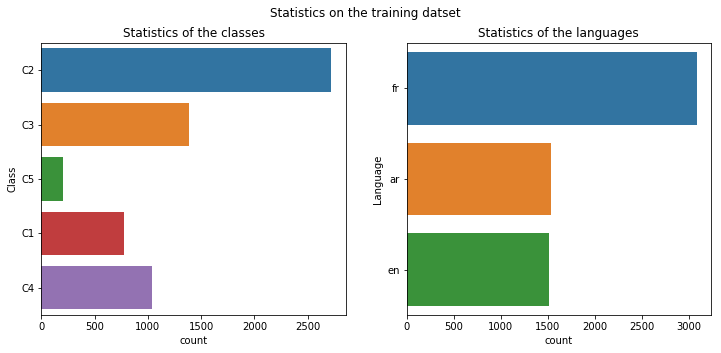

In [4]:
# Plot the statistics
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df_train, y='Class', ax = ax[0])
ax[0].set(title = "Statistics of the classes")
sns.countplot(data=df_train, y='Language', ax = ax[1])
ax[1].set(title = "Statistics of the languages")
fig.suptitle("Statistics on the training datset")
plt.show()

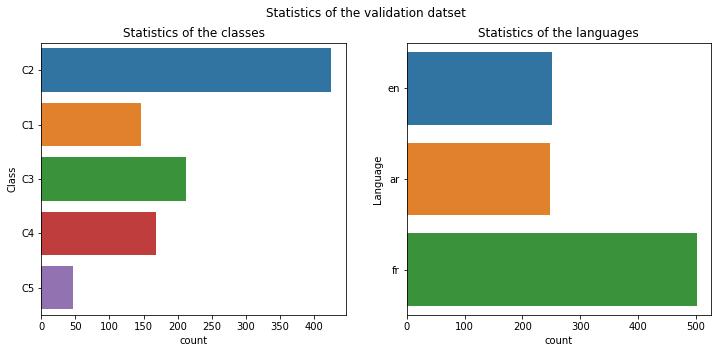

In [5]:
# Plot the statistics
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df_dev, y='Class', ax = ax[0])
ax[0].set(title = "Statistics of the classes")
sns.countplot(data=df_dev, y='Language', ax = ax[1])
ax[1].set(title = "Statistics of the languages")
fig.suptitle("Statistics of the validation datset")
plt.show()

** Bag-of-words ** <br>
Get data ready..

In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_train["Text"], df_train["Class"],\
                                                    test_size=0.2, random_state = 1)
print("the size of the test set is : %.2f " %(X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100) \
     + "%")
# Split the train set to train and validate sets 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 1)

the size of the test set is : 20.00 %


In [7]:
y_val.shape , X_test.shape

((1226,), (1226,))

perform a Naive Bayes Classifier :

In [8]:
# Create document vectors
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_val_counts = vectorizer.transform(X_val)
X_test_counts = vectorizer.transform(X_test)

In [9]:
# Train a Naive Bayes classifier
clf = MultinomialNB().fit(X_train_counts, y_train)
print("Accuracy on the validation dataset : "+ str(round(clf.score(X_val_counts, y_val), 2)))
print("Accuracy on the test dataset : " + str(round(clf.score(X_test_counts, y_test), 2)))

Accuracy on the validation dataset : 0.65
Accuracy on the test dataset : 0.67


Train the classifier on the all train dataset :

In [10]:
# Create document vectors
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(df_train["Text"])
X_train_counts = vectorizer.transform(df_train["Text"])
X_val_counts = vectorizer.transform(df_dev["Text"])
# Train a Naive Bayes classifier
clf = MultinomialNB().fit(X_train_counts, df_train["Class"])
print("Accuracy on the validation dataset : "+ str(round(clf.score(X_val_counts, df_dev["Class"]), 2)))

Accuracy on the validation dataset : 0.64
